In [1]:
import numpy as np
import mne
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go

In [17]:
# 분석대상 이름 입력
name = input("분석대상 이름을 입력하세요.")
print(f"분석대상 이름은 {name}입니다.")

# Loading saved TFR file
file_path = rf'H:\Mg_EEG\tfr_files\{name}_7200_tfr.h5'
tfr = mne.time_frequency.read_tfrs(file_path)
print(f"성공적으로 tfr 파일을 로딩하였습니다.")

# Saving raw file for back-up
tfr_raw = tfr.copy()
print(f"tfr_raw에 tfr을 복사하였습니다.")

분석대상 이름은 정금례입니다.
Reading H:\Mg_EEG\tfr_files\정금례_7200_tfr.h5 ...
성공적으로 tfr 파일을 로딩하였습니다.
tfr_raw에 tfr을 복사하였습니다.


In [ ]:
#데이터가 뭔가 이상할 때 리셋하는 복구 코드
#tfr = tfr_raw

In [18]:
# 플로팅할 데이터셋 생성
tfr_mean = np.mean(tfr.data, axis=0)
tfr_mean_mean = np.mean(tfr_mean, axis=0)
tfr_mean_raw = tfr_mean.copy()
tfr_mean_mean_raw = tfr_mean_mean.copy()

안 지운 time-power plot 저장

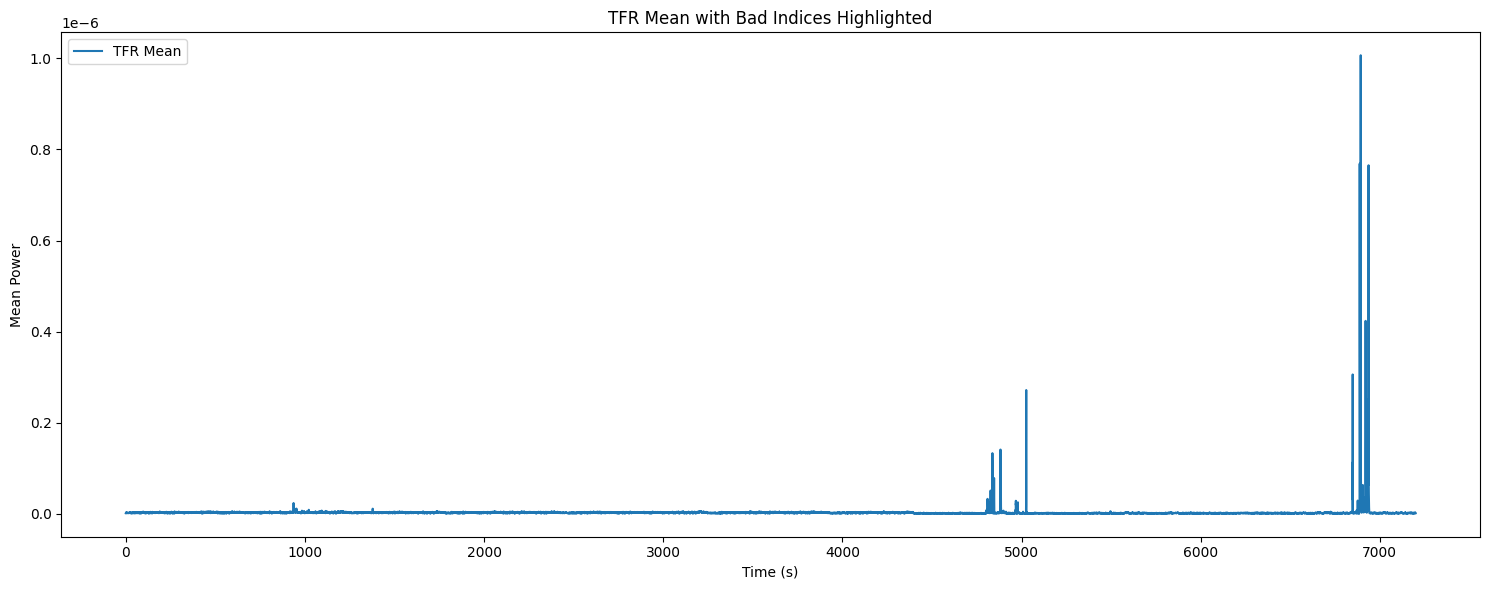

In [19]:
# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean_raw, label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
#for idx in bad_idx:
#    plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Bad Indices Highlighted')
plt.legend()

# 플롯 표시
plt.tight_layout()
plt.show()

Bad_idx 수정하기

In [33]:
# large artifact data load
csv_file_path = r'C:\Users\esin4\OneDrive\바탕 화면\Github\Mg_infusion_coma\large_artifact.csv'

large_artifact_data = pd.read_csv(csv_file_path, encoding='utf-8-sig')

# 입력한 이름이 데이터프레임에 존재하는지 확인하고 좌표 가져오기
if name in large_artifact_data['Name'].values:
    # 입력한 이름에 해당하는 데이터 가져오기
    coordinates = large_artifact_data[large_artifact_data['Name'] == name]['Coordinates'].values[0]
    
    # 좌표가 'skip'이면 빈 리스트로 설정
    if coordinates == 'skip':
        large_artifact = []
    else:
        # 좌표 문자열을 리스트로 변환
        import ast
        large_artifact = ast.literal_eval(coordinates)
else:
    print(f"{input_name}이(가) 데이터에 없습니다.")
    large_artifact = []

# 결과 출력
print("large_artifact 리스트:")
print(large_artifact)

# 인덱스로 바꾸기
bad_idx=[]

for t_start, t_end in large_artifact:
    bad_idx.extend(range(t_start*200, t_end*200))

# Bad index 지우는 경우에만 실행
tfr_mean[:, bad_idx] = tfr_mean.min()
tfr_mean_mean[bad_idx] = tfr_mean_mean.min()

large_artifact 리스트:
[(934, 1024), (1180, 1270), (1333, 1380), (4800, 4850), (4881, 4888), (4962, 4982), (5020, 5030), (6845, 6945)]


C:\Users\esin4\AppData\Local\Temp\ipykernel_27980\3381180800.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\esin4\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


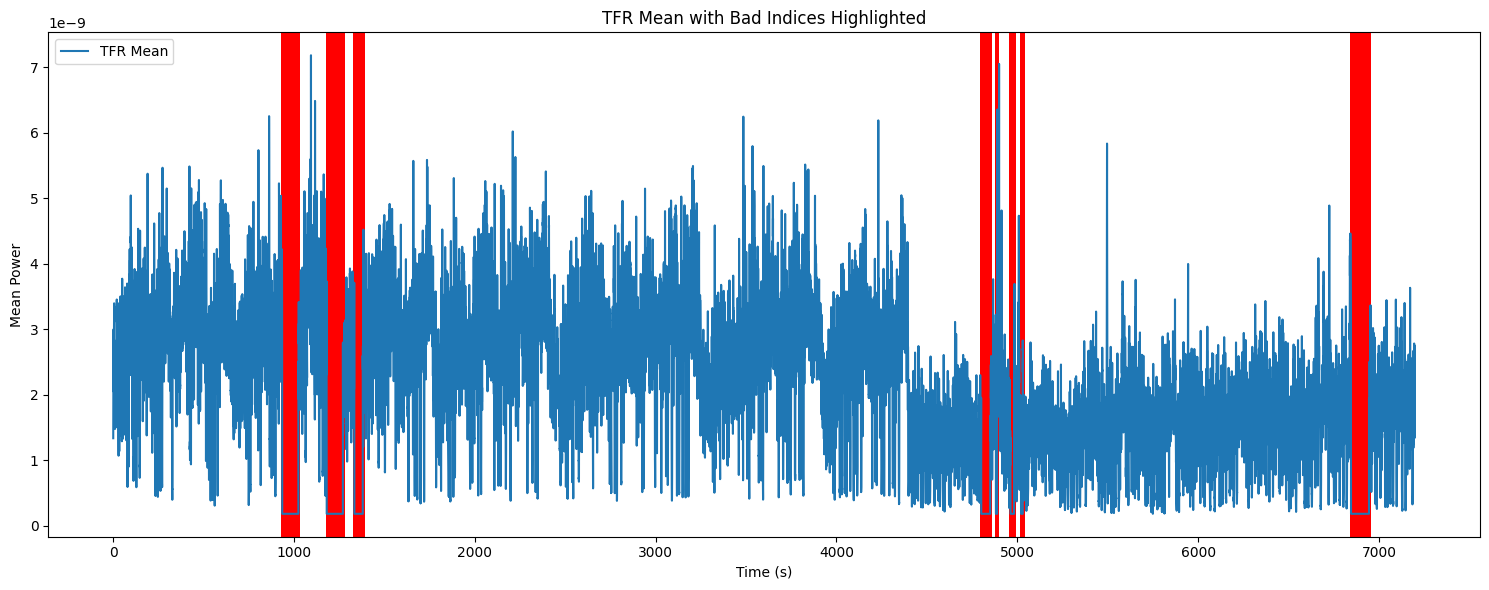

In [34]:
%matplotlib inline
# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean, label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Bad Indices Highlighted')
plt.legend()

# 플롯 표시
plt.tight_layout()
plt.show()

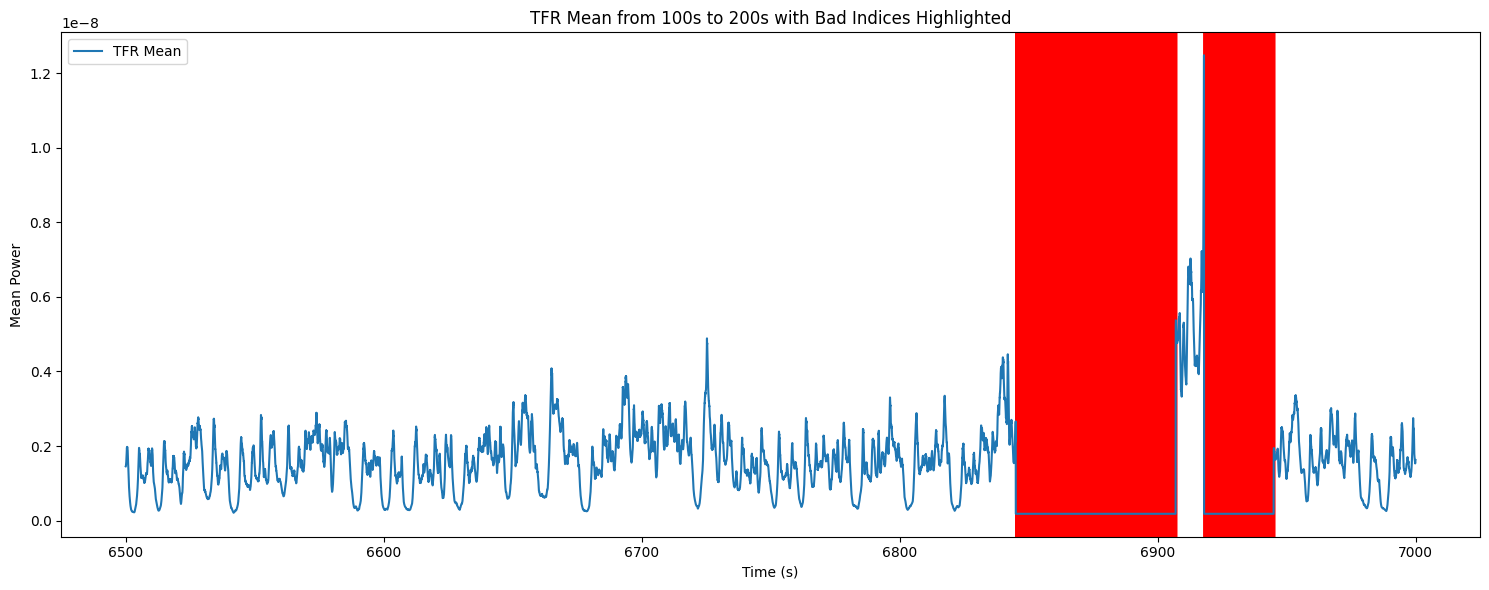

In [32]:
# 100초에서 200초 사이의 데이터를 찾기 위해 인덱스 계산
start_idx = np.searchsorted(tfr.times, 6500)
end_idx = np.searchsorted(tfr.times, 7000)

# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times[start_idx:end_idx], tfr_mean_mean[start_idx:end_idx], label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    if start_idx <= idx < end_idx:
        plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean from 100s to 200s with Bad Indices Highlighted')
plt.legend(loc='upper left')

# 플롯 표시
plt.tight_layout()
plt.show()

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                   norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=0.7)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# Convert tfr_mean_mean to a pandas Series
tfr_mean_mean_series = pd.Series(tfr_mean_mean)

# Calculate the moving average with window size 10
moving_average = tfr_mean_mean_series.rolling(window=10000).mean()

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean, label='TFR Mean')
plt.plot(tfr.times, moving_average, label='Moving Average')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Moving Average Trend Line')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# tfr_mean_mean 계산
tfr_mean_mean = np.mean(tfr_mean, axis=0)

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
im = ax1.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                    norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                    cmap='magma', shading='auto')

# artifact 구간 표시
for start, end in large_artifact:
    ax1.axvspan(start, end, color='white', alpha=0.7)

# Add labels and title for the first plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar for the first plot
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label('Power')

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# tfr.times에 대한 tfr_mean_mean의 플롯 생성
ax2.plot(tfr.times, tfr_mean_mean, label='TFR Mean', color='cyan')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    ax2.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# Add labels and title for the second plot
ax2.set_ylabel('Mean Power')

# Add a legend for the second plot
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# tfr_mean_mean 계산
tfr_mean_mean = np.mean(tfr_mean, axis=0)

# 이동평균 계산 (윈도우 크기 설정)
window_size = 10000
tfr_mean_mean_smooth = pd.Series(tfr_mean_mean).rolling(window=window_size, center=True).mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
im = ax1.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                    norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                    cmap='magma', shading='auto')

# artifact 구간 표시
for start, end in large_artifact:
    ax1.axvspan(start, end, color='white', alpha=0.7)

# Add labels and title for the first plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar for the first plot
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label('Power')

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# tfr.times에 대한 tfr_mean_mean의 이동평균 추세선 플롯 생성
ax2.plot(tfr.times, tfr_mean_mean_smooth, label='TFR Mean (Moving Average)', color='cyan')

# Add labels and title for the second plot
ax2.set_ylabel('Mean Power')

# Add a legend for the second plot
ax2.legend(loc='upper right')

# Draw a red line at 3600 seconds
ax2.axvline(x=3600, color='red')

# Display the plot
plt.tight_layout()
plt.show()